In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from itertools import combinations
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from data_analysis import extratreesclassifier_model

In [2]:
# import data
df = pd.read_csv('sports_management_encoded.csv')
df.head(10)

,Energy Consumption,Carbon Emissions,Waste Generation,Community Engagement,Volunteer Participation,Health Impact,Water Usage,Material Recycling Rate,Operational Cost Efficiency,Sustainability Score,Social Impact Level,Resource Efficiency,Event Scale_National,Event Scale_Regional,Event Focus_Health-Oriented,Event Focus_Recreational,Event Focus_Youth-Focused,Event Type Classification_Health-Oriented,Event Type Classification_Recreational,Event Type Classification_Youth-Focused
0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2.0,1.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2.0,2.0,2.0,0.0,2.0,1.0,1.0,1.0,1.0,2.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,2.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,1.0,2.0,1.0,2.0,0.0,1.0,0.0,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,2.0,1.0,1.0,0.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
7,2.0,2.0,1.0,2.0,0.0,2.0,0.0,0.0,2.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,2.0,2.0,1.0,2.0,1.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,2.0,2.0,2.0,1.0,2.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [3]:
# get an overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102000 entries, 0 to 101999
Data columns (total 20 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   Energy Consumption                         102000 non-null  float64
 1   Carbon Emissions                           102000 non-null  float64
 2   Waste Generation                           102000 non-null  float64
 3   Community Engagement                       102000 non-null  float64
 4   Volunteer Participation                    102000 non-null  float64
 5   Health Impact                              102000 non-null  float64
 6   Water Usage                                102000 non-null  float64
 7   Material Recycling Rate                    102000 non-null  float64
 8   Operational Cost Efficiency                102000 non-null  float64
 9   Sustainability Score                       102000 non-null  float64
 10  Social I

In [4]:
# split the data into features and target
X = df.drop(columns=['Sustainability Score'])
y = df['Sustainability Score']


Scores for the Model

Training Score : 0.9763790849673203
Testing Score: 0.43019607843137253


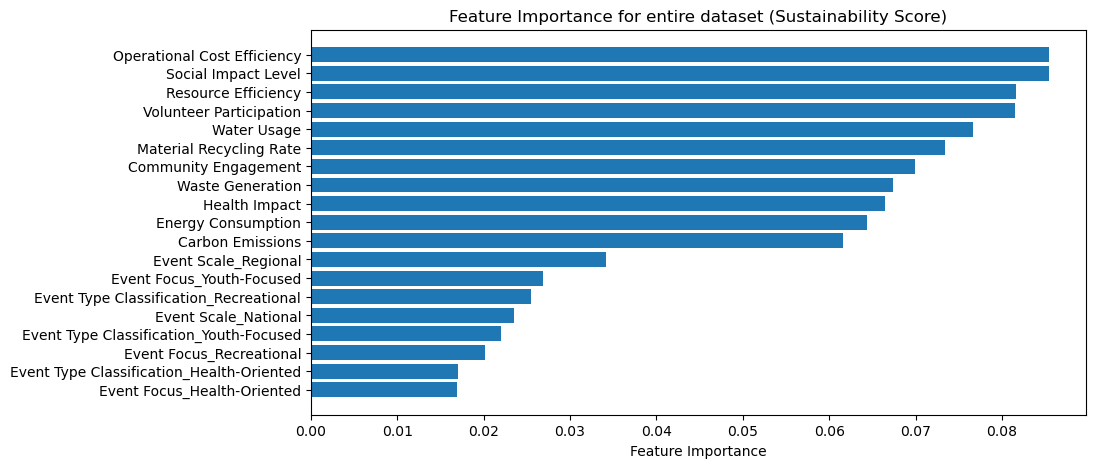

Classification Report

              precision    recall  f1-score   support

         0.0       0.20      0.08      0.12      5081
         1.0       0.31      0.20      0.24      7877
         2.0       0.49      0.71      0.58     12542

    accuracy                           0.43     25500
   macro avg       0.33      0.33      0.31     25500
weighted avg       0.38      0.43      0.39     25500

Confusion Matrix

[[ 424 1025 3632]
 [ 695 1586 5596]
 [1041 2541 8960]]


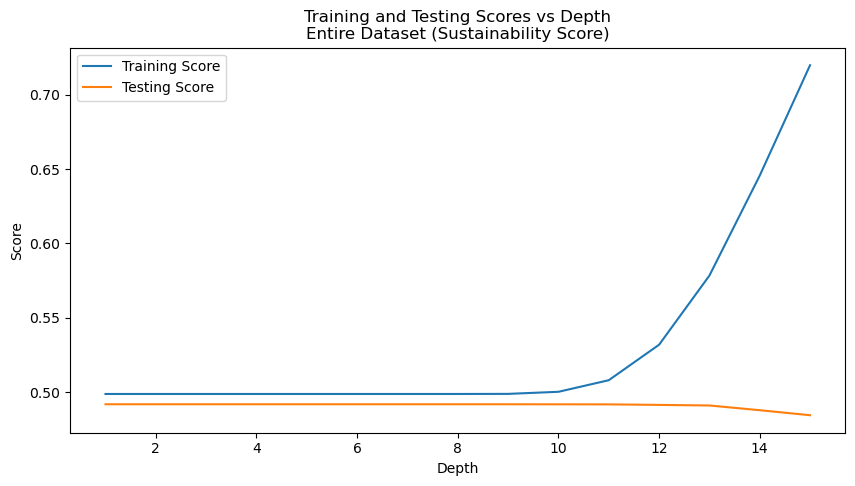

In [5]:
extratreesclassifier_model(X, y, 42, 'Feature Importance for entire dataset (Sustainability Score)','Entire Dataset (Sustainability Score)')

In [6]:
# Model to target only sustainability columns we believe should be included in the model
sustainability_columns = ['Energy Consumption', 'Carbon Emissions', 'Water Usage', 'Waste Generation', 'Material Recycling Rate', 'Sustainability Score']
df_sustainable = df[sustainability_columns]
df_sustainable.head(10)

,Energy Consumption,Carbon Emissions,Water Usage,Waste Generation,Material Recycling Rate,Sustainability Score
0,1.0,2.0,1.0,2.0,1.0,0.0
1,2.0,1.0,1.0,2.0,0.0,1.0
2,2.0,2.0,1.0,2.0,1.0,2.0
3,2.0,2.0,1.0,2.0,1.0,2.0
4,1.0,2.0,2.0,0.0,2.0,0.0
5,1.0,1.0,1.0,2.0,0.0,2.0
6,0.0,2.0,1.0,1.0,1.0,2.0
7,2.0,2.0,0.0,1.0,0.0,1.0
8,2.0,2.0,0.0,1.0,0.0,1.0
9,2.0,2.0,0.0,2.0,0.0,0.0


Scores for the Model

Training Score : 0.49887581699346406
Testing Score: 0.4908235294117647


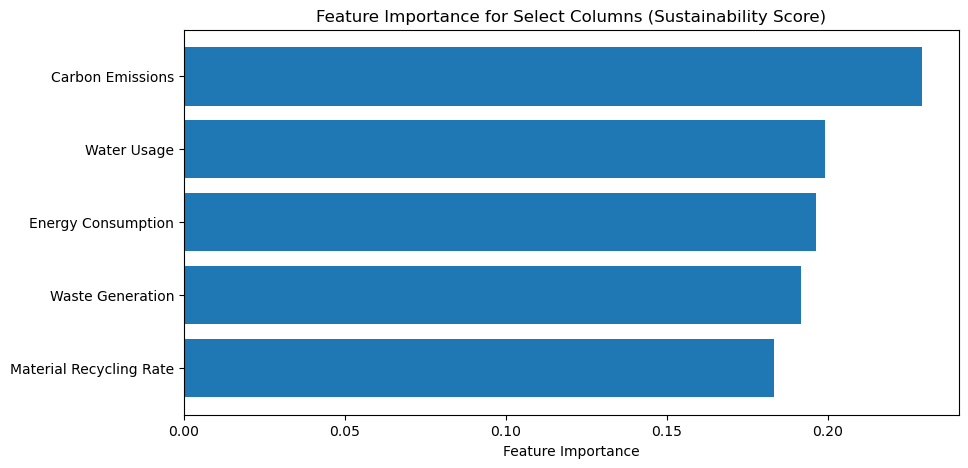

Classification Report



/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      5081
         1.0       0.26      0.00      0.00      7877
         2.0       0.49      1.00      0.66     12542

    accuracy                           0.49     25500
   macro avg       0.25      0.33      0.22     25500
weighted avg       0.32      0.49      0.33     25500

Confusion Matrix

[[    0    10  5071]
 [    0    19  7858]
 [    0    45 12497]]


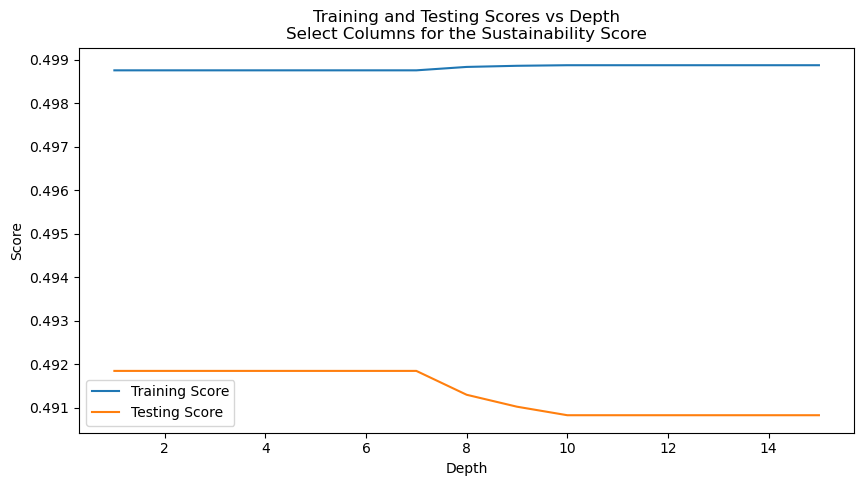

In [7]:
# run the model on the sustainability columns
X = df_sustainable.drop(columns=['Sustainability Score'])
y = df_sustainable['Sustainability Score']

extratreesclassifier_model(X, y, 42, 'Feature Importance for Select Columns (Sustainability Score)','Select Columns for the Sustainability Score')

In [8]:
# Model to target only sustainability columns as indicated by the dataset creator
sustainability_columns = ['Energy Consumption', 'Carbon Emissions', 'Waste Generation', 'Sustainability Score']
df_sustainable_creator = df[sustainability_columns]
df_sustainable_creator.head(10)


,Energy Consumption,Carbon Emissions,Waste Generation,Sustainability Score
0,1.0,2.0,2.0,0.0
1,2.0,1.0,2.0,1.0
2,2.0,2.0,2.0,2.0
3,2.0,2.0,2.0,2.0
4,1.0,2.0,0.0,0.0
5,1.0,1.0,2.0,2.0
6,0.0,2.0,1.0,2.0
7,2.0,2.0,1.0,1.0
8,2.0,2.0,1.0,1.0
9,2.0,2.0,2.0,0.0


Scores for the Model

Training Score : 0.4987581699346405
Testing Score: 0.491843137254902


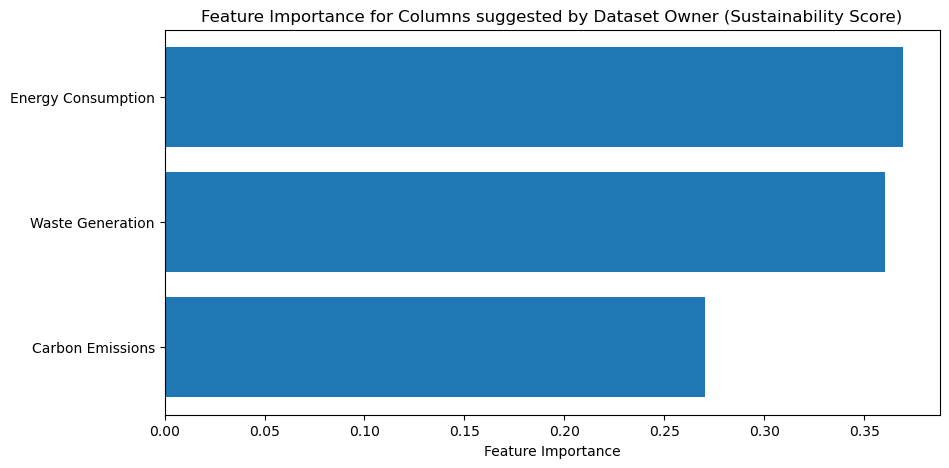

Classification Report

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      5081
         1.0       0.00      0.00      0.00      7877
         2.0       0.49      1.00      0.66     12542

    accuracy                           0.49     25500
   macro avg       0.16      0.33      0.22     25500
weighted avg       0.24      0.49      0.32     25500

Confusion Matrix

[[    0     0  5081]
 [    0     0  7877]
 [    0     0 12542]]


/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


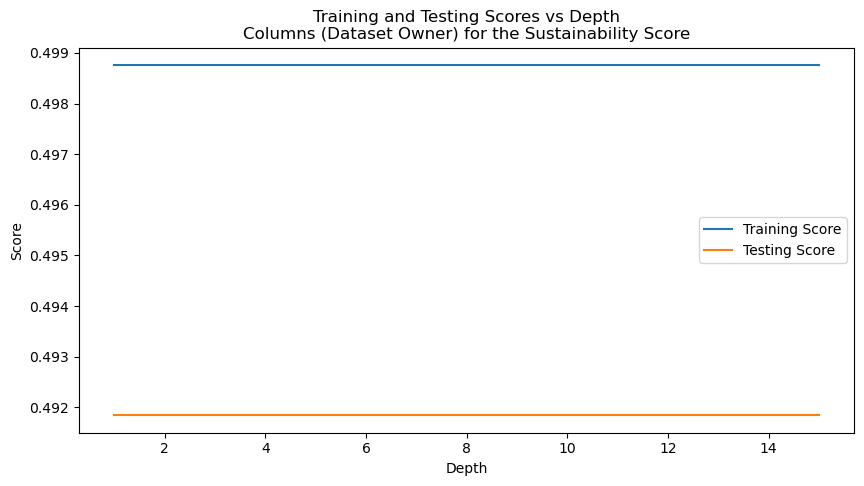

In [9]:
# run the model on the sustainability columns
X = df_sustainable_creator.drop(columns=['Sustainability Score'])
y = df_sustainable_creator['Sustainability Score']

extratreesclassifier_model(X, y, 42, 'Feature Importance for Columns suggested by Dataset Owner (Sustainability Score)','Columns (Dataset Owner) for the Sustainability Score')

In [10]:
# Model for Social Impact Feature as indicated by the dataset creator
social_imp_columns = ['Community Engagement', 'Volunteer Participation','Health Impact','Social Impact Level']
df_social_impact = df[social_imp_columns]
df_social_impact.head(10)

,Community Engagement,Volunteer Participation,Health Impact,Social Impact Level
0,1.0,1.0,1.0,2.0
1,1.0,0.0,0.0,0.0
2,0.0,2.0,1.0,0.0
3,1.0,1.0,1.0,0.0
4,0.0,0.0,1.0,1.0
5,1.0,2.0,0.0,0.0
6,1.0,0.0,1.0,1.0
7,2.0,0.0,2.0,2.0
8,2.0,1.0,2.0,0.0
9,1.0,2.0,1.0,1.0


Scores for the Model

Training Score : 0.40094117647058825
Testing Score: 0.40231372549019606


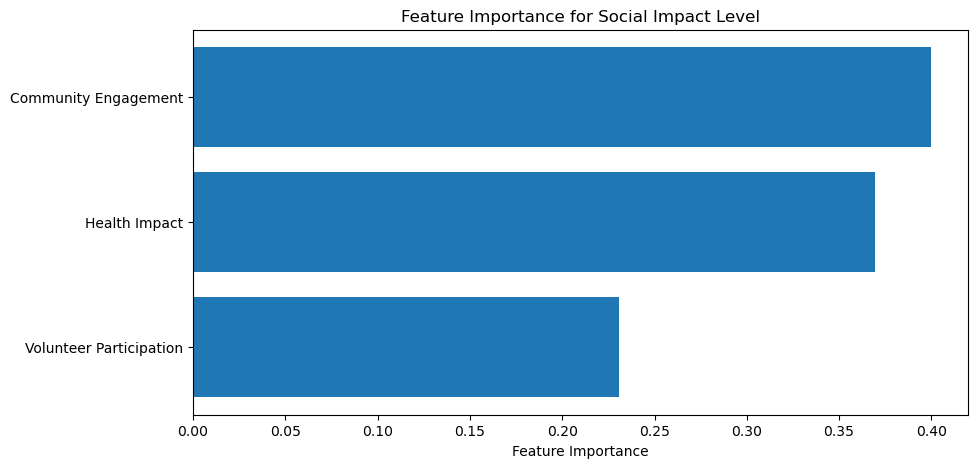

Classification Report

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      7626
         1.0       0.40      1.00      0.57     10259
         2.0       0.00      0.00      0.00      7615

    accuracy                           0.40     25500
   macro avg       0.13      0.33      0.19     25500
weighted avg       0.16      0.40      0.23     25500

Confusion Matrix



/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[[    0  7626     0]
 [    0 10259     0]
 [    0  7615     0]]


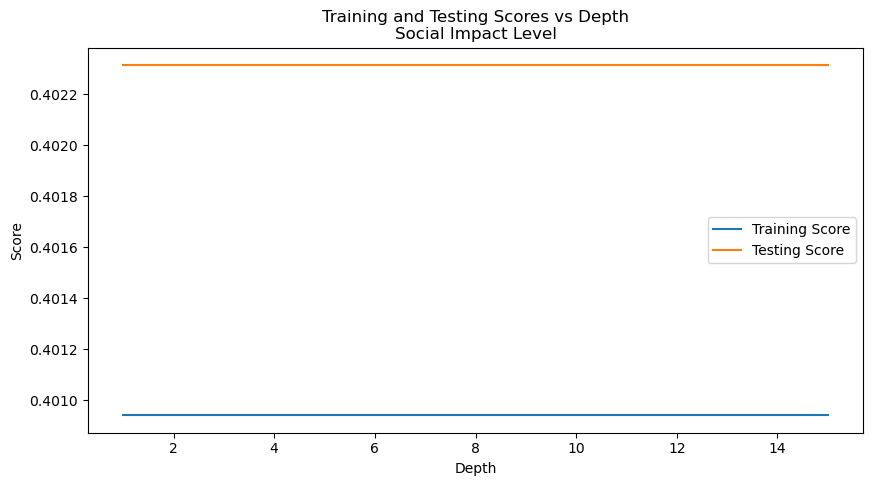

In [11]:
# run the model on the social impact columns
X = df_social_impact.drop(columns=['Social Impact Level'])
y = df_social_impact['Social Impact Level']

extratreesclassifier_model(X, y, 42, 'Feature Importance for Social Impact Level','Social Impact Level')

In [12]:
# Model for Resource Efficiency Feature as indicated by the dataset creator
res_df=pd.read_csv('sports_management_encoded_eventtype.csv')

resource_eff_columns = ['Operational Cost Efficiency', 'Water Usage', 'Material Recycling Rate', 'Resource Efficiency']
df_resource_efficiency = res_df[resource_eff_columns]
df_resource_efficiency.head(10)

,Operational Cost Efficiency,Water Usage,Material Recycling Rate,Resource Efficiency
0,2.0,1.0,1.0,1.0
1,1.0,1.0,0.0,1.0
2,1.0,1.0,1.0,2.0
3,1.0,1.0,1.0,2.0
4,2.0,2.0,2.0,1.0
5,1.0,1.0,0.0,1.0
6,2.0,1.0,1.0,1.0
7,2.0,0.0,0.0,0.0
8,1.0,0.0,0.0,0.0
9,2.0,0.0,0.0,1.0


Scores for the Model

Training Score : 0.5020653594771242
Testing Score: 0.5025098039215686


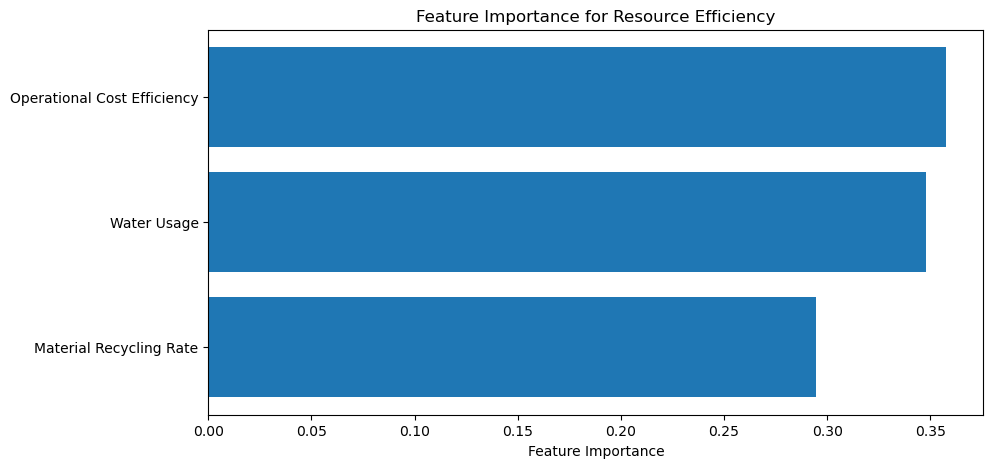

Classification Report



/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      6371
         1.0       0.50      1.00      0.67     12814
         2.0       0.00      0.00      0.00      6315

    accuracy                           0.50     25500
   macro avg       0.17      0.33      0.22     25500
weighted avg       0.25      0.50      0.34     25500

Confusion Matrix

[[    0  6371     0]
 [    0 12814     0]
 [    0  6315     0]]


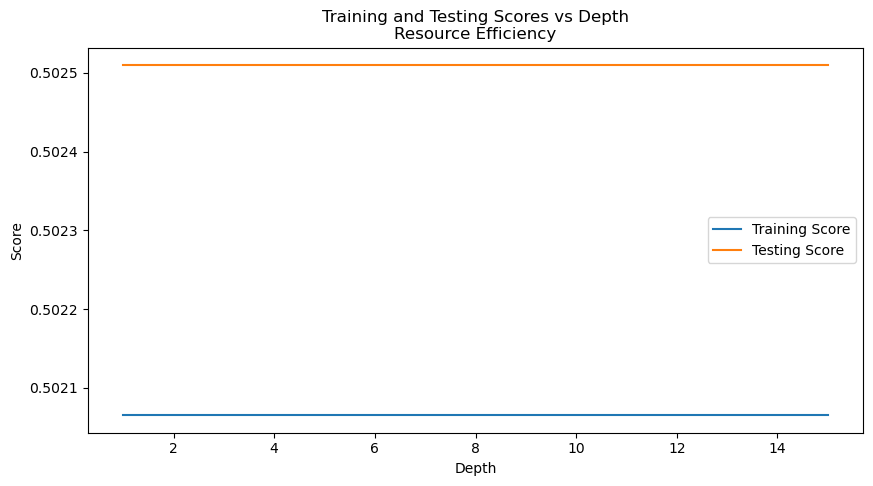

In [13]:
# run the model on the resource efficiency columns
X = df_resource_efficiency.drop(columns=['Resource Efficiency'])
y = df_resource_efficiency['Resource Efficiency']

extratreesclassifier_model(X, y, 42, 'Feature Importance for Resource Efficiency','Resource Efficiency')